In [1]:
%matplotlib inline
import pandas as pd
import numpy as np


## After deriving the stochastic gradient
DF(U,V)/DU = (err * V_j


            U[i, :] += lr * (err * V[j, :] - (lmb * U[i, :]))
            V[j, :] += lr * (err * U[i, :] - (lmb * V[j, :]))

In [2]:
data = pd.read_csv('ratings.csv')
#cast to int so IDS can be used as indices
data = data.astype(int)

In [3]:
#encoding Movie Ids as indices from 0 -> # of unique movies)))
encode, decode = {}, {}
for i, x in enumerate(data['movieId'].unique()):
    encode[x] = i
    decode[i] = x
    
data['movieId'] = data['movieId'].apply(lambda x: encode[x])



In [4]:
ratings = data.pivot(index='userId', columns='movieId', values='rating')
ratings.head()

movieId,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,4.0,4.0,5.0,5.0,3.0,5.0,4.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:

samples = data[['userId', 'movieId', 'rating']].copy()
#subtract one to map userId to proper indices 
samples['userId'] = samples['userId'] - 1
samples = samples.values
#preview the samples array. userId, movieId, rating
samples

array([[   0,    0,    4],
       [   0,    1,    4],
       [   0,    2,    4],
       ...,
       [ 609, 3121,    5],
       [ 609, 1392,    5],
       [ 609, 2873,    3]])

In [6]:
#rsme calculator
def rmse(dset, preds):
    rmse = 0 
    for i, j, rating in dset:
        rmse += np.power((rating - preds[i, j]), 2)
    return np.sqrt(1/len(dset) * rmse)
    

In [7]:
#shuffling dataset
np.random.shuffle(samples)

iteration 25 
rsme for train
 1.3839631574585922 
rsme for test
 1.5627814885232616
iteration 50 
rsme for train
 1.3145595659863425 
rsme for test
 1.5185561794567322


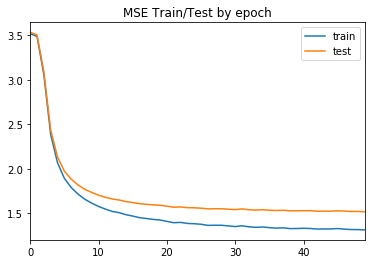

In [26]:
lr = .01
#arbitrarily chosen
lmb = float(1)
#num of epochs
epochs = 50
#best K i've found
K = 1
def train_model(lr, lmb, K, epochs):
    '''lr = learning rate
       lmb = regularization parameter
       K = number of latent dimensions
       epochs = #numer of times to run SGD'''
    len_users, len_movies = ratings.shape
    U = np.random.normal(scale=1./K, size=(len_users, K))
    V = np.random.normal(scale=1./K, size=(len_movies, K))

    train = samples[:80000]
    test = samples[90000:]
    error = []
    for iteration in range(1, epochs+1):
        #shuffles train set before running SGD
        np.random.shuffle(train)
        for i, j, rating in train:
            pred = U[i,:] * V[j,:]
            err = (rating - pred)

            U[i, :] += lr * (err * V[j, :] - (lmb * U[i, :]))
            V[j, :] += lr * (err * U[i, :] - (lmb * V[j, :]))

        res = U @ V.T

        rmse_train = rmse(train, res)
        rmse_test = rmse(test, res)
        if iteration % 25 == 0:
            print('iteration', iteration, '\nrsme for train\n', rmse_train, 
                   '\nrsme for test\n', rmse_test)
        error += [(rmse_train, rmse_test)]
    return error

training_error = train_model(lr, lmb, K, epochs)

#plotting
pd.DataFrame(data=training_error, columns=['train', 'test']).plot(title='MSE Train/Test by epoch')

In [27]:
ending = training_error[-1]
print('training RMSE', round(ending[0], 3), 'testing RMSE', round(ending[1], 3))

training RMSE 1.315 testing RMSE 1.519


## Analysis
As we can see from above, the loss get's smaller as we run more epochs, with the testing RMSE converging at a higher value than the training RMSE. We will now run it for a range of lambdas & and 100 epochs to ensure convergence and look at the difference in train/test validation loss. 


In [28]:

results = {}
for reg in [10**-6, 10**-3, .1, .5, 2, 5, 10, 
           20, 50, 100, 500, 1000]:
    
    #iterating through the learning rates 
    print('\n\npredicting for', reg)
    results[reg] = train_model(lr, reg, K, 50)
    
    



predicting for 1e-06
iteration 25 
rsme for train
 0.8686671822792135 
rsme for test
 1.2041255840216363
iteration 50 
rsme for train
 0.8283268518554994 
rsme for test
 1.1879552113055378


predicting for 0.001
iteration 25 
rsme for train
 0.8704377818158706 
rsme for test
 1.2079867853291182
iteration 50 
rsme for train
 0.8287215522350655 
rsme for test
 1.1910482871954695


predicting for 0.1
iteration 25 
rsme for train
 0.9003464414367611 
rsme for test
 1.1931088043934341
iteration 50 
rsme for train
 0.8454996953516619 
rsme for test
 1.1644334384940767


predicting for 0.5
iteration 25 
rsme for train
 1.051198254008548 
rsme for test
 1.293755048653406
iteration 50 
rsme for train
 0.9857041932339335 
rsme for test
 1.2618683006300404


predicting for 2
iteration 25 
rsme for train
 2.2410825513227404 
rsme for test
 2.31903892444838
iteration 50 
rsme for train
 2.1796272961995022 
rsme for test
 2.272427394151982


predicting for 5
iteration 25 
rsme for train
 3.5217398

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in multiply
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in add
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in multiply
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in multiply
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in subtract


iteration 25 
rsme for train
 nan 
rsme for test
 nan
iteration 50 
rsme for train
 nan 
rsme for test
 nan


predicting for 1000
iteration 25 
rsme for train
 nan 
rsme for test
 nan
iteration 50 
rsme for train
 nan 
rsme for test
 nan


In [29]:
end = {x: y[-1] for x, y in results.items()}

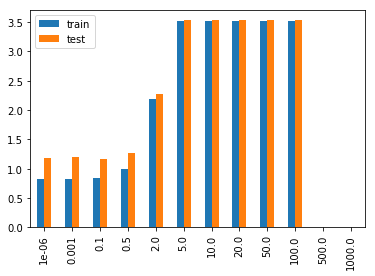

In [30]:
end_plot = pd.DataFrame.from_dict(data = end).T
end_plot.columns = ['train', 'test']
end_plot.plot(kind='bar')

## Analysis
As we can see, lower lambdas are our optimum in this case. The higher the regularization parameter the lower the MSE, as our regularization overcomes our model fitting. Perhaps this would change with a subsequent higher learning rate, but in previous experimentation the learning rate was very sensitive and could cause the algorithm to not converge so I kept it constant for this test

Our optimal lambda appears to be between 0 & .5

In [31]:
end_plot

,train,test
0.000001,0.828327,1.187955
0.001000,0.828722,1.191048
0.100000,0.845500,1.164433
0.500000,0.985704,1.261868
2.000000,2.179627,2.272427
5.000000,3.521754,3.531485
10.000000,3.521756,3.531486
20.000000,3.521756,3.531486
50.000000,3.521756,3.531486
100.000000,3.521756,3.531486


In [11]:
len_users, len_movies = ratings.shape
K = 1

#this is the best LR i've found so far
lr = .01
#arbitrarily chosen
lmb = .5
#might change epochs later depending on learning rate
epochs = 30

U = np.random.normal(scale=1./K, size=(len_users, K))
V = np.random.normal(scale=1./K, size=(len_movies, K))

train = samples[:80000]
test = samples[90000:]
error = []
for iteration in range(1, epochs):
    #shuffles train set before running SGD
    np.random.shuffle(train)
    for i, j, rating in train:
        pred = U[i,:] * V[j,:]
        err = (rating - pred)

        U[i, :] += lr * (err * V[j, :] - (lmb * U[i, :]))
        V[j, :] += lr * (err * U[i, :] - (lmb * V[j, :]))
    
    res = U @ V.T
    
    rmse_train = rmse(train, res)
    rmse_test = rmse(test, res)
    if iteration % 10 == 0:
        print('iteration', iteration, '\nrsme for train\n', rmse_train, 
               '\nrsme for test\n', rmse_test)
    error += [(rmse_train, rmse_test)]

    

    

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3291, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-240732b95ee4>", line 21, in <module>
    pred = U[i,:] * V[j,:]
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2033, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.7/site-packages/IPython/core/ultratb.py", line 1095, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/lib/python3.7/site-packages/IPython/core/ultratb.py", line 313, in wrapped
    return f(*

KeyboardInterrupt: 